In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [66]:
df= pd.read_csv('data_cancer.csv')

In [117]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [118]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [69]:
y=df['diagnosis']
x=df.drop(['diagnosis','id','Unnamed: 32'],axis=1)
x.head()
df.drop(['id','Unnamed: 32'],inplace=True,axis=1)

Malignant count 212
Benign count 357


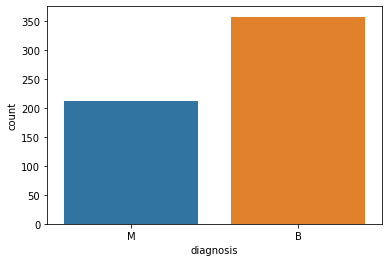

In [70]:
ax=sns.countplot(x='diagnosis',data=df,label='Count')
a,b=y.value_counts()
print('Malignant count', b )
print('Benign count',a)

In [71]:
y.value_counts(normalize=True,sort=True, ascending=True)

M    0.372583
B    0.627417
Name: diagnosis, dtype: float64

In [42]:
data = pd.melt(df,id_vars="diagnosis",var_name="features",value_name='value')
data

,diagnosis,features,value
0,M,radius_mean,17.99000
1,M,radius_mean,20.57000
2,M,radius_mean,19.69000
3,M,radius_mean,11.42000
4,M,radius_mean,20.29000
...,...,...,...
17065,M,fractal_dimension_worst,0.07115
17066,M,fractal_dimension_worst,0.06637
17067,M,fractal_dimension_worst,0.07820
17068,M,fractal_dimension_worst,0.12400


In [72]:
xtrain,xtest, ytrain, ytest= train_test_split(x,y, test_size=.1, random_state=1)
print(xtrain.shape)
print(xtest.shape)


(512, 30)
(57, 30)


In [122]:
xtrain.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,512.000000,512.00000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,...,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,14.108641,19.31291,91.851035,653.511523,0.096099,0.104059,0.088610,0.048563,0.180658,0.062747,...,16.260510,25.672246,107.179688,880.907422,0.132001,0.255493,0.273003,0.114239,0.289662,0.083952
std,3.528965,4.36533,24.376182,351.846876,0.013984,0.053399,0.080794,0.039010,0.027517,0.006988,...,4.865858,6.241968,33.872301,574.117500,0.022816,0.161249,0.213246,0.066811,0.062681,0.018222
min,6.981000,9.71000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.685000,16.15750,75.022500,418.325000,0.085992,0.063028,0.028545,0.019983,0.161575,0.057800,...,12.980000,20.975000,83.727500,512.000000,0.116600,0.141950,0.108850,0.062960,0.248575,0.071468
50%,13.280000,18.88000,85.935000,545.650000,0.095450,0.092950,0.059935,0.033010,0.179150,0.061510,...,14.910000,25.305000,97.260000,682.000000,0.131200,0.216100,0.225450,0.098545,0.281350,0.080075
75%,15.757500,21.81250,103.725000,781.400000,0.104900,0.130525,0.132325,0.074320,0.195075,0.066022,...,18.767500,29.757500,125.025000,1073.500000,0.145225,0.341600,0.385500,0.163450,0.317025,0.092105
max,28.110000,39.28000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


C:\Users\Karamjyot\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (512). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


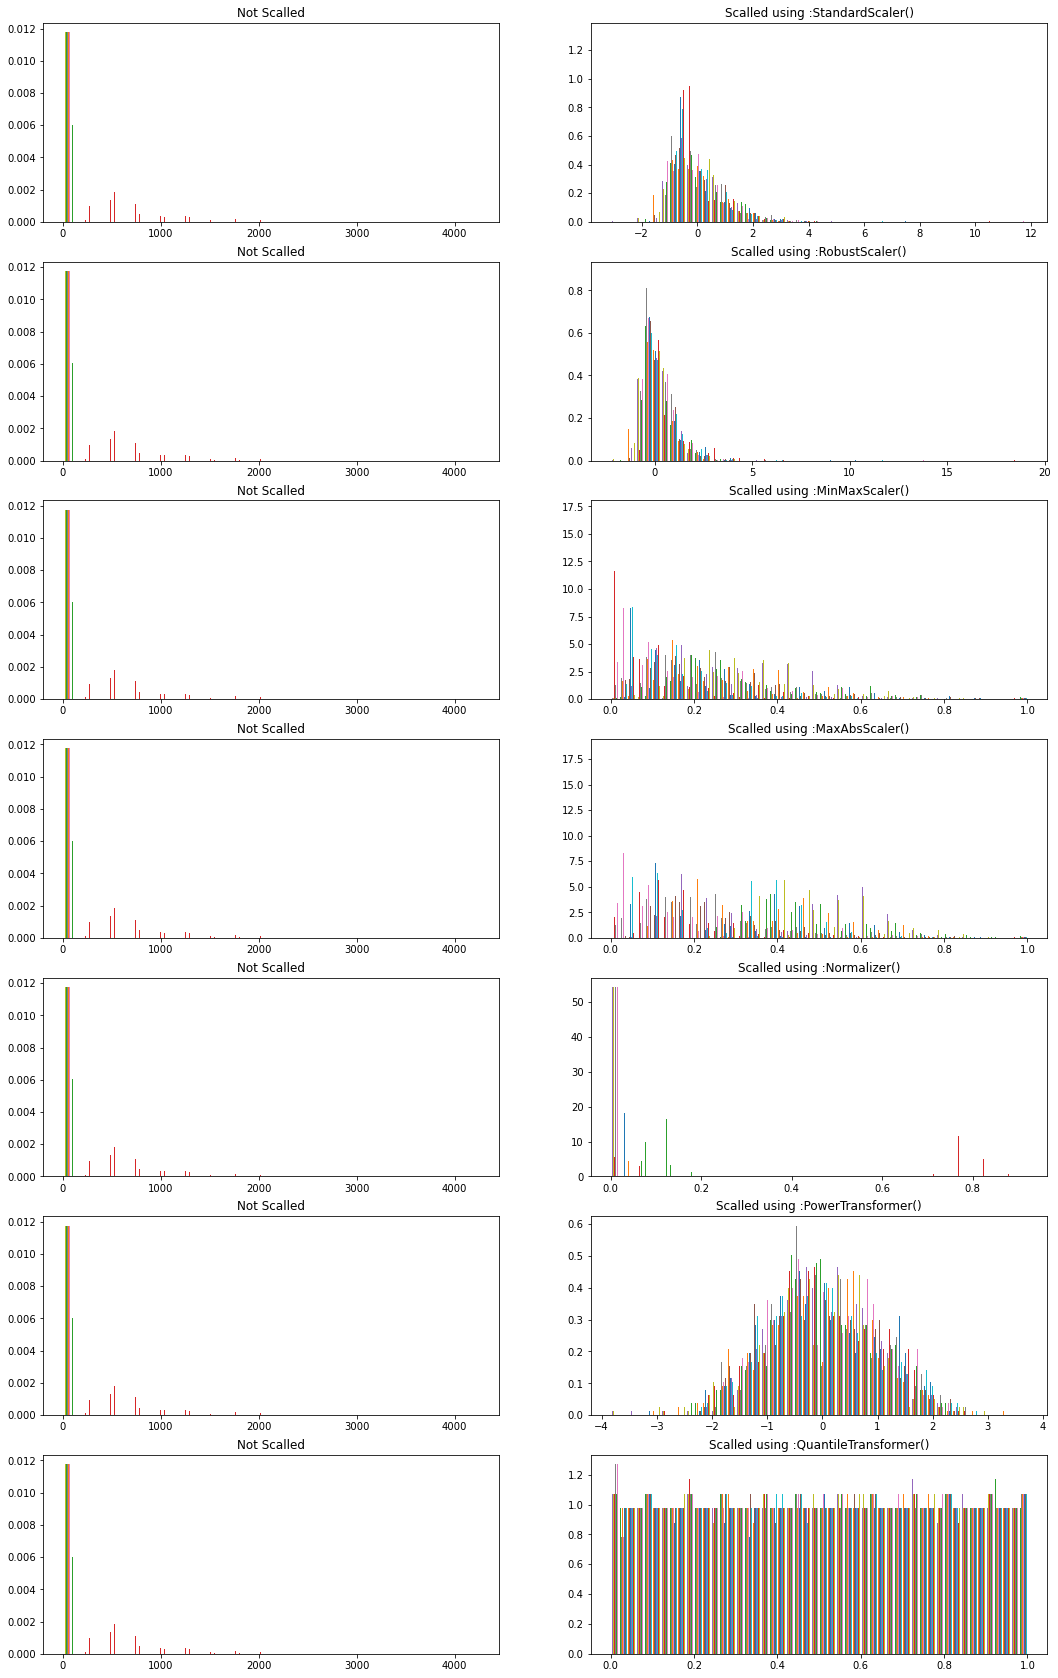

In [104]:
# sklearn.preprocessing.StandardScaler
# z = (x - u) / s
#StandardScaler removes the mean and scales the data to unit variance.
#The scaling shrinks the range of the feature values as shown in the left figure below.
#However, the outliers have an influence when computing the empirical mean and standard deviation. 

# MinMaxScaler rescales the data set such that all feature values are in the range [0, 1] 
# However, this scaling compresses all inliers into the narrow range [0, 0.005] for the transformed number of households.
# Both StandardScaler and MinMaxScaler are very sensitive to the presence of outliers.

#MaxAbsScaler is similar to MinMaxScaler except that the values are mapped in the range [0, 1]. On positive only data,
#both scalers behave similarly. MaxAbsScaler therefore also suffers from the presence of large outliers.

# Robust Scaler
#Scale features using statistics that are robust to outliers.
#This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range).
#The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

#Apply a power transform featurewise to make data more Gaussian-like.
#Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. 
#This is useful for modeling issues related to heteroscedasticity (non-constant variance), 
#or other situations where normality is desired.
#Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform. 
#The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood.
#Box-Cox requires input data to be strictly positive, while Yeo-Johnson supports both positive or negative data.
#By default, zero-mean, unit-variance normalization is applied to the transformed data.

#QuantileTransformer
#Transform features using quantiles information.
#This method transforms the features to follow a uniform or a normal distribution. 
#Therefore, for a given feature, this transformation tends to spread out the most frequent values. 
#It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.
#that this transform is non-linear. It may distort linear correlations between variables measured at the same
#scale but renders variables measured at different scales more directly comparable.
#First an estimate of the cumulative distribution function of a feature is used 
#to map the original values to a uniform distribution.
#The obtained values are then mapped to the desired output distribution using the associated quantile function.
#Features values of new/unseen data that fall below or above the fitted range will be mapped to the 
#bounds of the output distribution. 


#Normalize samples individually to unit norm.
#Each sample (i.e. each row of the data matrix) with at least one non zero component is 
#rescaled independently of other samples so that its norm (l1, l2 or inf) equals one.


from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,MaxAbsScaler,\
                                  Normalizer,PowerTransformer,QuantileTransformer

Transformer_list=[StandardScaler(),RobustScaler(),MinMaxScaler(),MaxAbsScaler(),
                  Normalizer(),PowerTransformer(),QuantileTransformer()]

x_train=xtrain.copy()
fig,ax=plt.subplots(len(Transformer_list),2,figsize=(18, 30))
#ax = ax.flatten()
for ind,x in enumerate(Transformer_list):
    ax[ind][0].hist(x_train,bins=50,density=True)
    ax[ind][0].set_title('Not Scalled')
    scale=x
    ax[ind][1].hist(scale.fit_transform(x_train), bins=50,density=True)
    y=str(x)
    ax[ind][1].set_title('Scalled using :' + y  )

    


C:\Users\Karamjyot\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (512). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


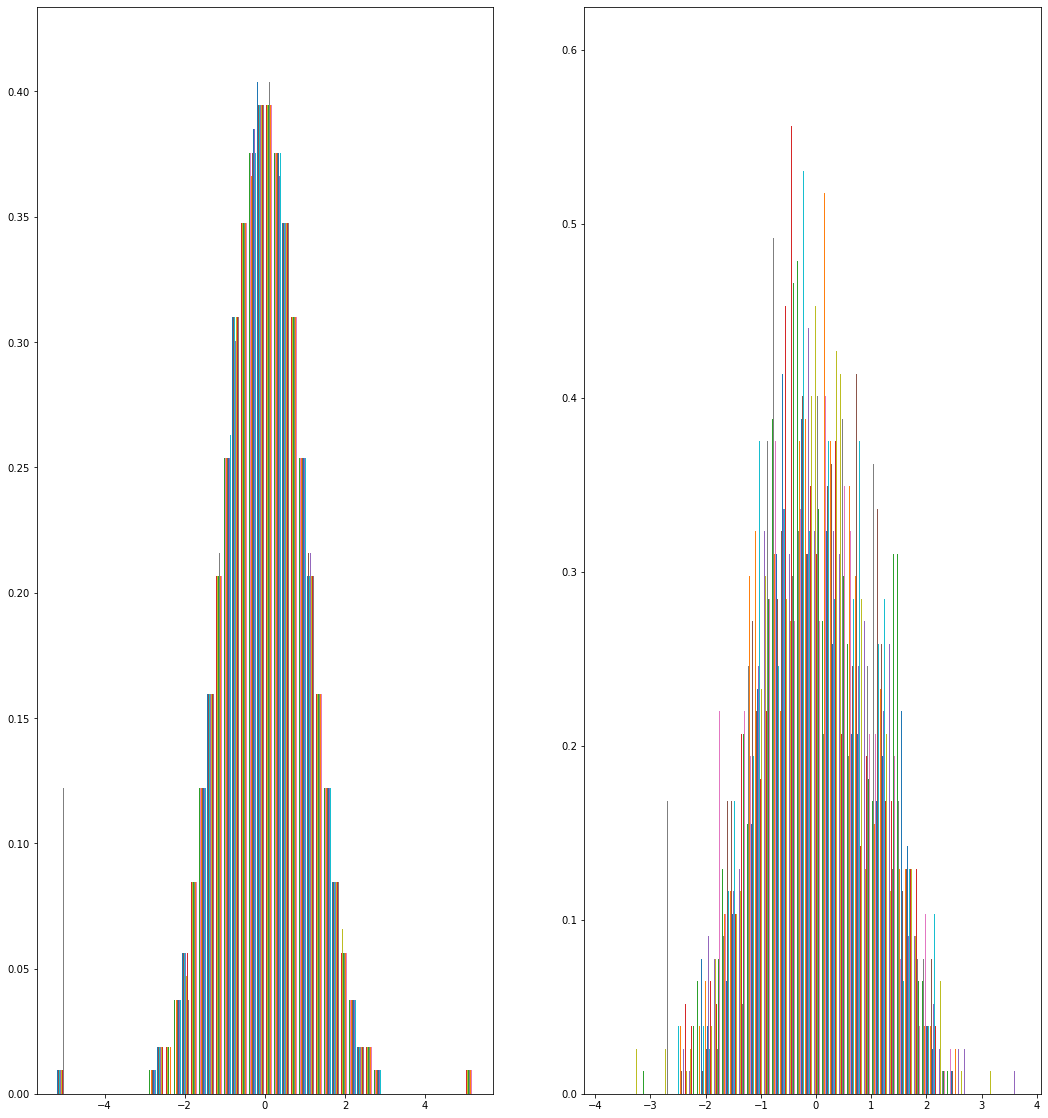

In [113]:
from sklearn.preprocessing import maxabs_scale,minmax_scale,normalize,quantile_transform,\
                                  robust_scale,scale,power_transform

fig,ax=plt.subplots(1,2,figsize=(18, 20))
scale=QuantileTransformer(output_distribution='normal')
ax[0].hist(scale.fit_transform(x_train), bins=50,density=True);
scale=PowerTransformer()
ax[1].hist(scale.fit_transform(x_train),bins=50,density=True);
#Transformer_list=[StandardScaler(),RobustScaler(),MinMaxScaler(),MaxAbsScaler(),
#                  Normalizer(),PowerTransformer(),QuantileTransformer()]
#x_train=xtrain.copy()
#fig,ax=plt.subplots(len(Transformer_list),2,figsize=(18, 30))
#ax = ax.flatten()
#for ind,x in enumerate(Transformer_list):
#    sns.histplot(x_train,kde=True,ax=ax[ind][0])
#    ax[ind][0].set_title('Not Scalled')
#    scale=x
#    ax[ind][1].hist(scale.fit_transform(x_train), bins=50,density=True)
#    sns.histplot(scale.fit_transform(x_train),kde=True,ax=ax[ind][1])
#    y=str(x)
#    ax[ind][1].set_title('Scalled using :' + y  )

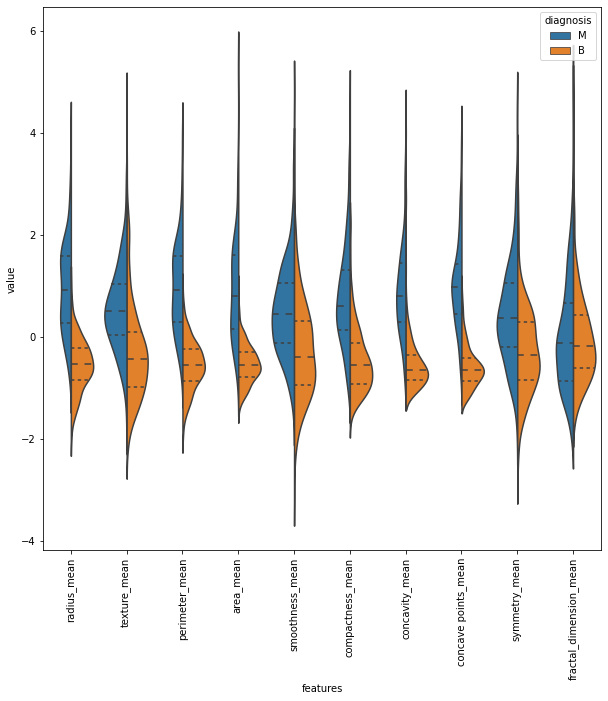

In [159]:
# first ten features
data_dia = ytrain
data = xtrain
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([data_dia,data_n_2.iloc[:,0:10]],axis=1)

data = pd.melt(data,id_vars="diagnosis",
                  var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90);

#Lets interpret the plot above together. For example, in texture_mean feature, 
#median of the Malignant and Benign looks like separated so it can be good for
#classification. However, in fractal_dimension_mean feature, median of the Malignant 
#and Benign does not looks like separated so it does not gives good information for classification.

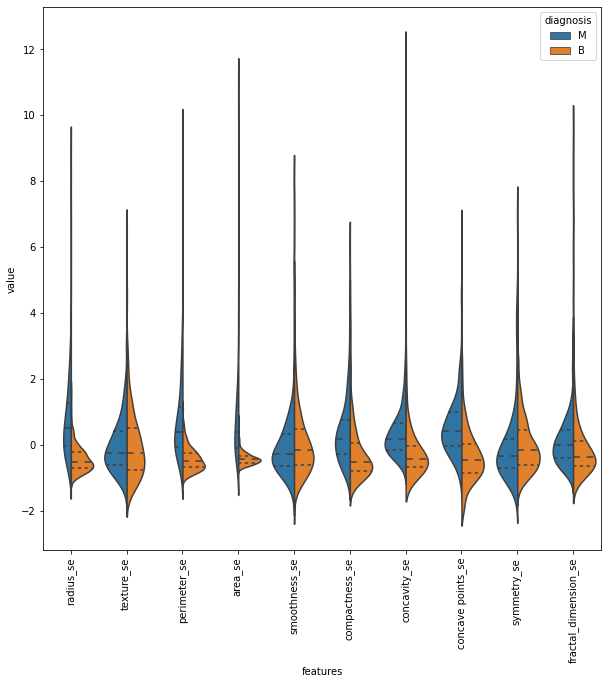

In [161]:
# Second ten features
data = pd.concat([data_dia,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90);

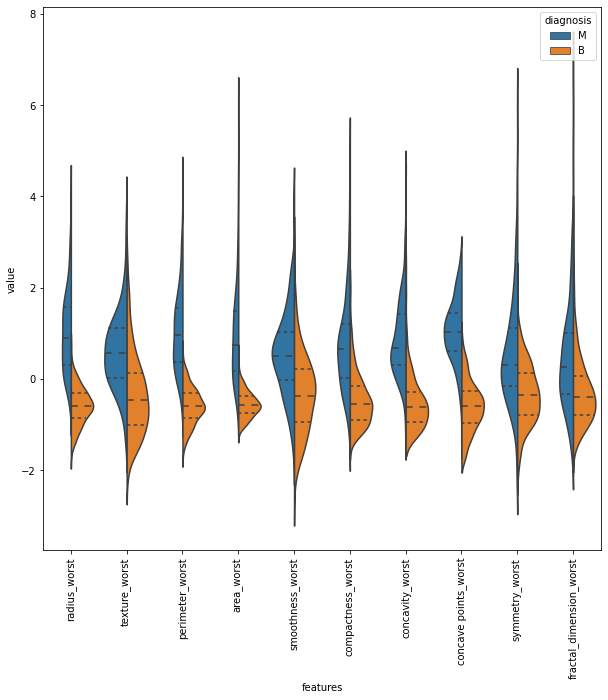

In [163]:
# Second ten features
data = pd.concat([data_dia,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90);

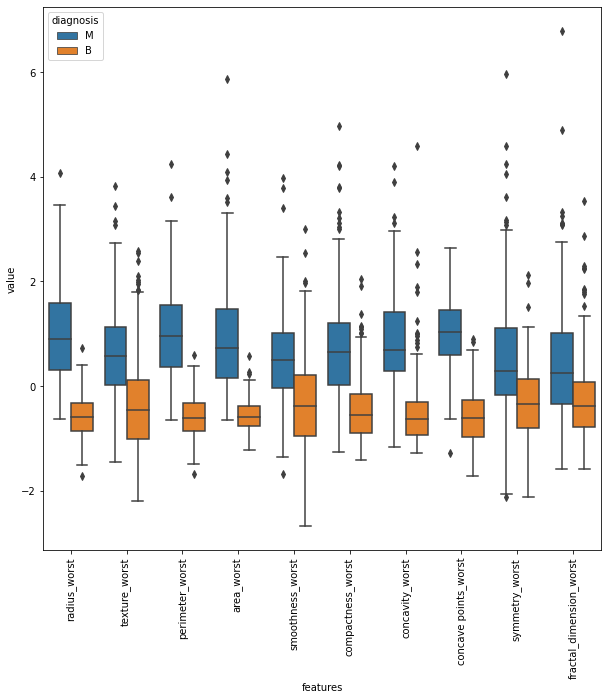

In [165]:
# As an alternative of violin plot, box plot can be used
# box plots are also useful in terms of seeing outliers
# I do not visualize all features with box plot
# In order to show you lets have an example of box plot
# If you want, you can visualize other features as well.
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90);

In [183]:
# quantizing continous variable
pd.cut(xtrain['radius_mean'],3,labels=["small", "medium", "huge"],retbins=True)

(277    medium
 378     small
 547     small
 159     small
 9       small
         ...  
 129    medium
 144     small
 72     medium
 235    medium
 37      small
 Name: radius_mean, Length: 512, dtype: category
 Categories (3, object): ['small' < 'medium' < 'huge'],
 array([ 6.959871, 14.024   , 21.067   , 28.11    ]))

In [182]:

pd.cut(xtrain['radius_mean'],bins=4,retbins=True,)

(277    (17.545, 22.828]
 378    (12.263, 17.545]
 547      (6.96, 12.263]
 159      (6.96, 12.263]
 9      (12.263, 17.545]
              ...       
 129    (17.545, 22.828]
 144      (6.96, 12.263]
 72     (12.263, 17.545]
 235    (12.263, 17.545]
 37     (12.263, 17.545]
 Name: radius_mean, Length: 512, dtype: category
 Categories (4, interval[float64]): [(6.96, 12.263] < (12.263, 17.545] < (17.545, 22.828] < (22.828, 28.11]],
 array([ 6.959871, 12.26325 , 17.5455  , 22.82775 , 28.11    ]))

In [181]:
bins = pd.IntervalIndex.from_tuples([(0, 10), (10, 20), (20, 1000)])
pd.cut(xtrain['radius_mean'],bins=bins,retbins=True,)

(277    (10, 20]
 378    (10, 20]
 547    (10, 20]
 159    (10, 20]
 9      (10, 20]
          ...   
 129    (10, 20]
 144    (10, 20]
 72     (10, 20]
 235    (10, 20]
 37     (10, 20]
 Name: radius_mean, Length: 512, dtype: category
 Categories (3, interval[int64]): [(0, 10] < (10, 20] < (20, 1000]],
 IntervalIndex([(0, 10], (10, 20], (20, 1000]],
               closed='right',
               dtype='interval[int64]'))

In [187]:
pd.qcut(xtrain['radius_mean'],q=4,retbins=True,)


(277                 (15.758, 28.11]
 378                 (13.28, 15.758]
 547    (6.9799999999999995, 11.685]
 159    (6.9799999999999995, 11.685]
 9                   (11.685, 13.28]
                    ...             
 129                 (15.758, 28.11]
 144    (6.9799999999999995, 11.685]
 72                  (15.758, 28.11]
 235                 (13.28, 15.758]
 37                  (11.685, 13.28]
 Name: radius_mean, Length: 512, dtype: category
 Categories (4, interval[float64]): [(6.9799999999999995, 11.685] < (11.685, 13.28] < (13.28, 15.758] < (15.758, 28.11]],
 array([ 6.981 , 11.685 , 13.28  , 15.7575, 28.11  ]))

In [301]:
#partial_emptyy= np.random.randint(0,1000,size=500)
#partial_empty= np.random.choice(1000,size=500)
full= np.random.randn(10000,10)
partial_empty=full.copy()

In [237]:
#seq_int=np.arange(0,1000)
#partial_empty

In [256]:
#np.random.choice(partial_empty,size=50,replace=False)

In [302]:
partial_empty.ravel()[np.random.choice(partial_empty.size,size=50000,replace=False)] =np.nan

In [258]:
#partial_empty

In [303]:
pe=pd.DataFrame( partial_empty)

In [304]:
pe.isnull().sum()

0    4987
1    5056
2    5003
3    5069
4    4994
5    4913
6    5041
7    4956
8    4990
9    4991
dtype: int64

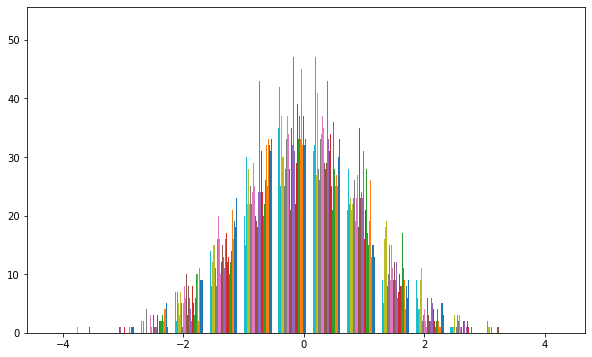

In [305]:

plt.figure(figsize=(10,6))
plt.hist(full,bins=1000);

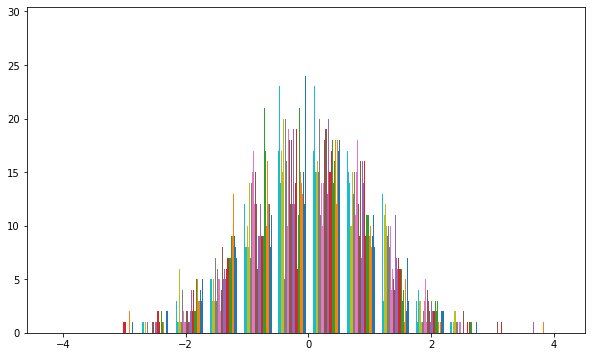

In [306]:
plt.figure(figsize=(10,6))
plt.hist(pe,bins=1000);


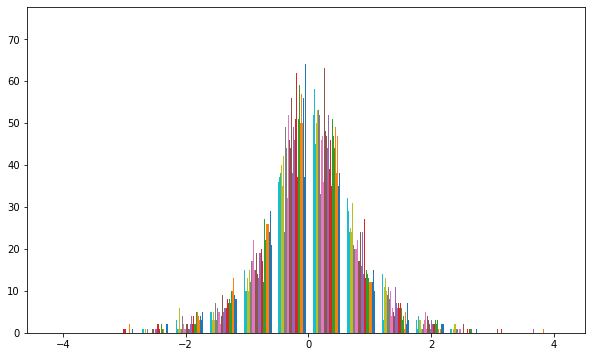

In [307]:
# after Imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer,IterativeImputer,SimpleImputer  

#Imputation for completing missing values using k-Nearest Neighbors.
#Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors 
#found in the training set. Two samples are close if the features that neither is missing are close.


imputer = KNNImputer()
knn_values=imputer.fit_transform(pe)
plt.figure(figsize=(10,6))
plt.hist(knn_values,bins=1000);

C:\Users\Karamjyot\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


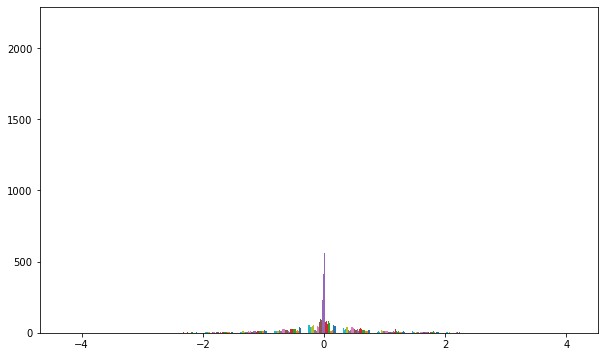

In [309]:
#Multivariate imputer that estimates each feature from all the others.
#A strategy for imputing missing values by modeling each feature with missing values as a 
#function of other features in a round-robin fashion.

imputer = IterativeImputer(random_state=0)
imputer.fit(pe)
iter_values=imputer.transform(pe)
plt.figure(figsize=(10,6))
plt.hist(iter_values,bins=1000);

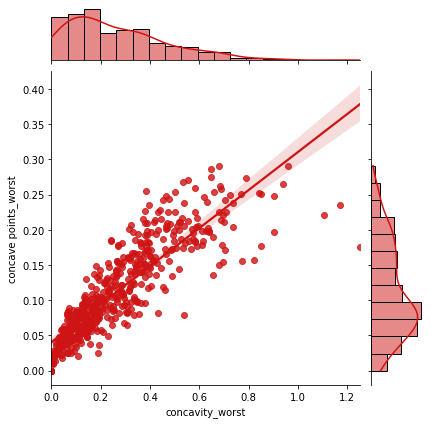

In [314]:
sns.jointplot(xtrain.loc[:,'concavity_worst'], xtrain.loc[:,'concave points_worst'], kind="reg", color="#ce1414")

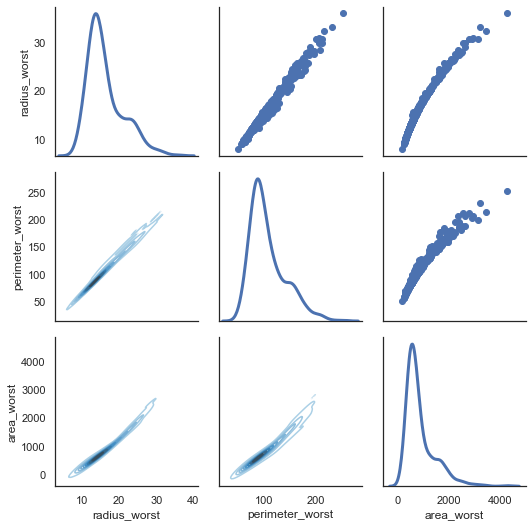

In [320]:
sns.set(style="white")
df = xtrain.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

C:\Users\Karamjyot\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Karamjyot\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Karamjyot\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Karamjyot\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 39.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Karamjyot\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

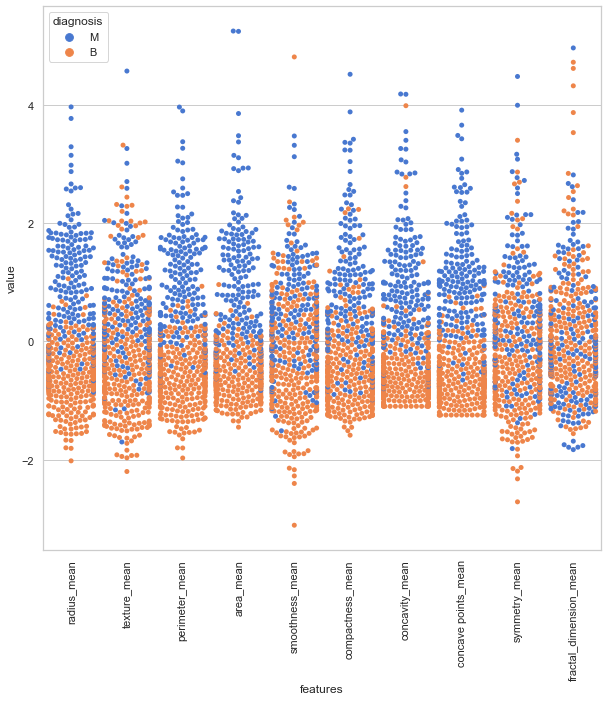

In [323]:
sns.set(style="whitegrid", palette="muted")
data_dia = ytrain
data = xtrain
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))

sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90);

<AxesSubplot:>

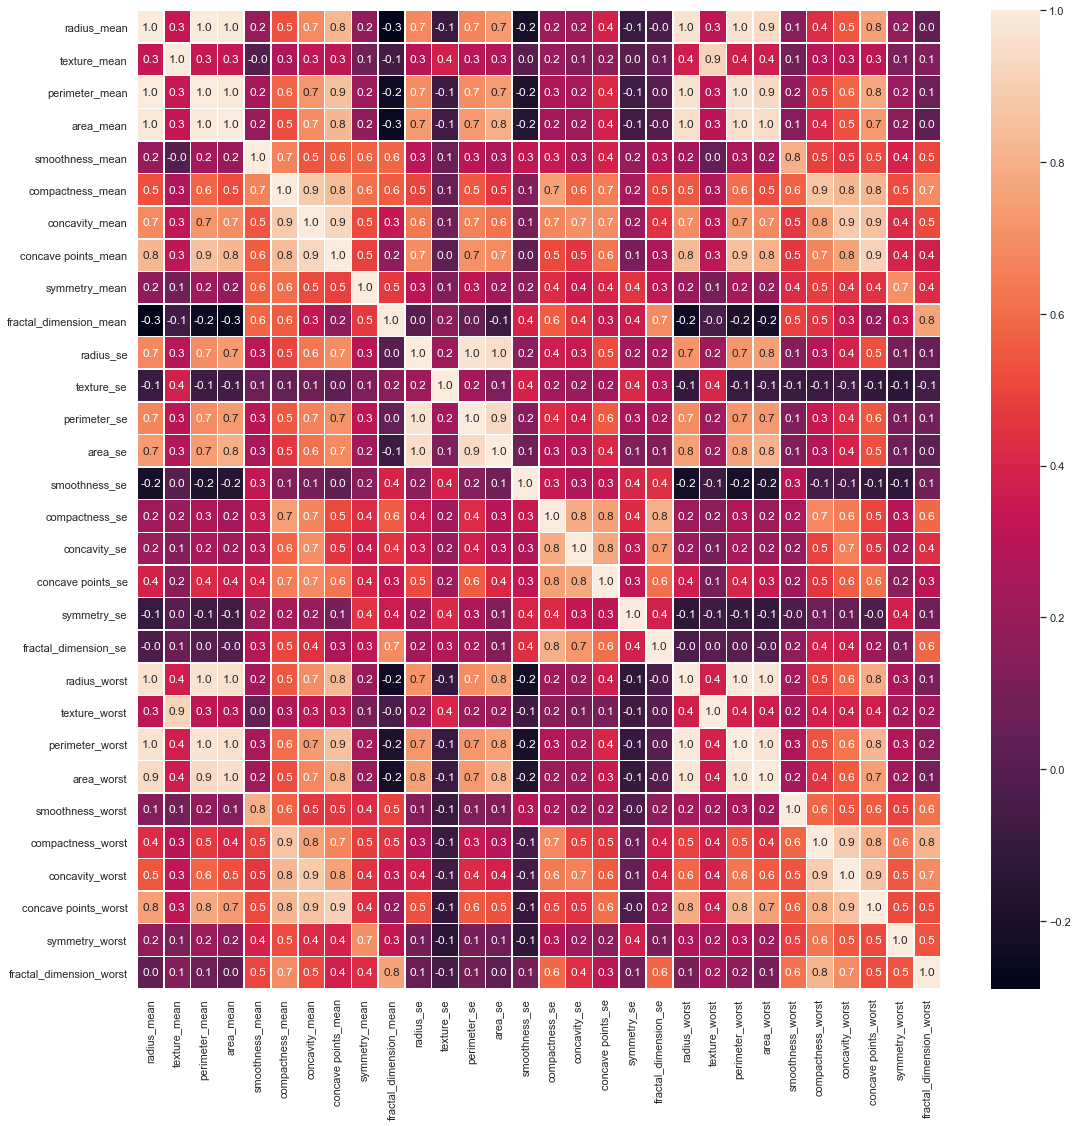

In [324]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(xtrain.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [79]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(xtrain, ytrain)
print('Score list:', select_feature.scores_)
#pick score you want

Score list: [2.42074035e+02 9.12211401e+01 1.83799182e+03 4.91453894e+04
 1.49458998e-01 5.34142604e+00 1.88769478e+01 9.82154326e+00
 2.54971636e-01 5.58984159e-05 3.19719636e+01 3.01101915e-04
 2.34724829e+02 8.11100718e+03 2.42183665e-03 6.45604350e-01
 1.10922701e+00 3.01599967e-01 2.39959007e-05 7.55497674e-03
 4.51642228e+02 1.68266629e+02 3.38104290e+03 1.03812633e+05
 3.88394288e-01 1.92965919e+01 3.90277466e+01 1.28208915e+01
 1.26928263e+00 2.44016007e-01]


In [83]:
from sklearn.ensemble import RandomForestClassifier
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(xtrain,ytrain)
importances = clr_rf_5.feature_importances_
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(xtrain.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 20 (0.134286)
2. feature 22 (0.130820)
3. feature 27 (0.111300)
4. feature 23 (0.107962)
5. feature 3 (0.092685)
6. feature 7 (0.081424)
7. feature 2 (0.049936)
8. feature 26 (0.047710)
9. feature 6 (0.042718)
10. feature 0 (0.032269)
11. feature 13 (0.029315)
12. feature 21 (0.014053)
13. feature 1 (0.012882)
14. feature 25 (0.011581)
15. feature 24 (0.011039)
16. feature 29 (0.008669)
17. feature 12 (0.008571)
18. feature 10 (0.008445)
19. feature 28 (0.007956)
20. feature 15 (0.007601)
21. feature 16 (0.007516)
22. feature 5 (0.006095)
23. feature 4 (0.005685)
24. feature 17 (0.005519)
25. feature 11 (0.004947)
26. feature 19 (0.004705)
27. feature 8 (0.004480)
28. feature 14 (0.003618)
29. feature 9 (0.003370)
30. feature 18 (0.002843)


In [86]:
np.argsort(importances)[::-1]

array([20, 22, 27, 23,  3,  7,  2, 26,  6,  0, 13, 21,  1, 25, 24, 29, 12,
       10, 28, 15, 16,  5,  4, 17, 11, 19,  8, 14,  9, 18], dtype=int64)

In [106]:
#Basically, it uses one of the classification methods (random forest in our example), 
#assign weights to each of features. Whose absolute weights are the smallest are pruned from
#the current set features. That procedure is recursively repeated on the pruned set until the desired number of features
#Like previous method, we will use 5 features. However, which 5 features will we use 
#? We will choose them with RFE method.
#Recursive feature elimination
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=10, step=1)
rfe = rfe.fit(xtrain, ytrain)
print('Chosen best 5 feature by rfe:',xtrain.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['area_mean', 'concavity_mean', 'concave points_mean', 'area_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')


In [92]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(xtrain, ytrain)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', xtrain.columns[rfecv.support_])

Optimal number of features : 30
Best features : Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [96]:
from sklearn.linear_model import Lasso,LogisticRegression
from sklearn.feature_selection import SelectFromModel
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1',solver='saga'))
sel_.fit(xtrain, ytrain)
selected_feat = xtrain.columns[(sel_.get_support())]
print('total features: {}'.format((xtrain.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_ == 0)))
selected_feat

total features: 30
selected features: 20
features with coefficients shrank to zero: 7


C:\Users\Karamjyot\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

In [97]:
sel_.get_support()

array([ True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True])

In [105]:
#Transformer that performs Sequential Feature Selection.
#This Sequential Feature Selector adds (forward selection) or removes (backward selection) 
#features to form a feature subset in a greedy fashion. At each stage, this estimator chooses the best
#feature to add or remove based on the cross-validation score of an estimator.

#sklearn.feature_selection.SequentialFeatureSelector(estimator, *,
#n_features_to_select=None, direction='forward', scoring=None, cv=5, n_jobs=None)
from  sklearn.feature_selection import SequentialFeatureSelector
rff = RandomForestClassifier()
sfs = SequentialFeatureSelector(rff, n_features_to_select=10,direction='forward')
sfs.fit(xtrain, ytrain)
selected_feat = xtrain.columns[(sfs.get_support())]
selected_feat


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'fractal_dimension_se',
       'texture_worst', 'area_worst', 'smoothness_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
Indeed, when introducing RFE, Guyon does so using Support Vector Machines,
and proposes two different methods to rank the single predictors.
At the same time Kohavi tests backward elimination both on tree classifiers 
and naive bayes - therefore the scoring methods for the features were different.
From what I know, RFE does the whole cycle of the eliminations and then chooses the best subset.
While backward regression stops at the point when the score starts decreasing. 
Otherwise, the would not have been any difference between forward and backward step-wise regressions. 
https://stats.stackexchange.com/questions/450518/rfe-vs-backward-elimination-is-there-a-difference
    https://discuss.analyticsvidhya.com/t/how-does-the-recursive-feature-elimination-rfe-works-and-how-it-is-different-from-backward-elimination/74199

In [345]:
from sklearn.utils import check_scalar, assert_all_finite,check_array,check_consistent_length,check_X_y
#assert_all_finite(pe)
assert_all_finite(full)

check_scalar(1,name='ab',target_type=(np.int,))

In [10]:
df = pd.read_csv('balance-scale.data', 
                 names=['balance', 'var1', 'var2', 'var3', 'var4'])
 
# Display example observations
df.head()

,balance,var1,var2,var3,var4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [3]:
df['balance'].value_counts()

L    288
R    288
B     49
Name: balance, dtype: int64

In [11]:
df['balance'] = [1 if b=='B' else 0 for b in df.balance]
 
df['balance'].value_counts()

0    576
1     49
Name: balance, dtype: int64

In [5]:
from sklearn.utils import resample
df_majority= df[df['balance']==0]
df_minority=df[df['balance']==1]

df_minority_sam=resample(df_minority,replace=True,n_samples=576)
df_upsampled = pd.concat([df_majority, df_minority_sam])

In [6]:
df_upsampled['balance'].value_counts()

0    576
1    576
Name: balance, dtype: int64

Counter({0: 99000, 1: 1000})


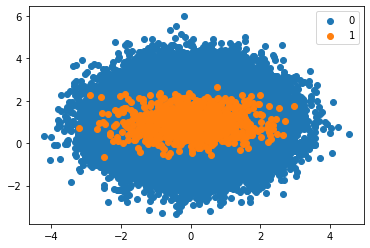

In [45]:
from collections import Counter
from sklearn.datasets import make_classification
from numpy import where

X, y = make_classification(n_samples=100000, n_features=3, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [46]:
xtrain,xtest, ytrain, ytest= train_test_split(X,y, test_size=.1, random_state=1)

In [47]:
print(X.shape)
print(y.shape)
np.unique(y,return_counts=True)

(100000, 3)
(100000,)


(array([0, 1]), array([99000,  1000], dtype=int64))

In [58]:
from imblearn.over_sampling import RandomOverSampler,SMOTE,ADASYN,BorderlineSMOTE,KMeansSMOTE,SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN,SMOTETomek

Counter({0: 99000, 1: 99000})


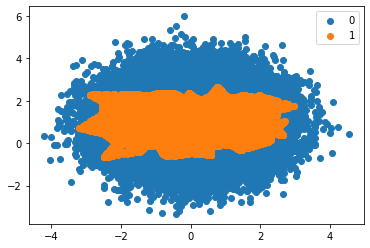

In [48]:

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()


In [52]:

from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


k_values = [1, 3,  5,  7]
for k in k_values:
    # define pipeline
    model = DecisionTreeClassifier()
    over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.5)
    steps = [('over', over), ('under', under), ('model', model)]
    pipeline = Pipeline(steps=steps)
    pipeline.fit(xtrain, ytrain)
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, xtest,ytest , scoring='roc_auc', cv=cv, n_jobs=-1)
    score = mean(scores)
    print('> Train k=%d,  Mean ROC AUC: %.3f' % (k, score))
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, xtest,ytest , scoring='roc_auc', cv=cv, n_jobs=-1)
    score = mean(scores)
    print('> Test k=%d,  Mean ROC AUC: %.3f' % (k, score))
#What smote does is simple. First it finds the n-nearest neighbors in the minority 
#class for each of the samples in the class . Then it draws a line between the the neighbors an generates
#random points on the lines

#The original paper on SMOTE suggested combining SMOTE with random undersampling of the majority class.
#We can update the example to first oversample the minority class to have 10 percent the number of examples
#of the majority class (e.g. about 1,000),
#then use random undersampling to reduce the number of examples in the majority class to have 50 percent
#more than the minority class (e.g. about 2,000).


> Train k=1,  Mean ROC AUC: 0.950
> Test k=1,  Mean ROC AUC: 0.950
> Train k=3,  Mean ROC AUC: 0.953
> Test k=3,  Mean ROC AUC: 0.951
> Train k=5,  Mean ROC AUC: 0.958
> Test k=5,  Mean ROC AUC: 0.951
> Train k=7,  Mean ROC AUC: 0.960
> Test k=7,  Mean ROC AUC: 0.954


In [53]:
#Its a improved version of Smote. What it does is same as SMOTE just with a minor improvement.
#After creating those sample it adds a random small values to the points thus making it more realistic. 
#ADASYN
#The key idea of ADASYN algorithm is to use a density distribution as a criterion to automatically decide 
#the number of synthetic samples that need to be generated for each minority data example.

k_values = [1, 3,  5,  7]
for k in k_values:
    # define pipeline
    model = DecisionTreeClassifier()
    over = ADASYN(sampling_strategy=0.1, n_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.5)
    steps = [('over', over), ('under', under), ('model', model)]
    pipeline = Pipeline(steps=steps)
    pipeline.fit(xtrain, ytrain)
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, xtest,ytest , scoring='roc_auc', cv=cv, n_jobs=-1)
    score = mean(scores)
    print('> Train k=%d,  Mean ROC AUC: %.3f' % (k, score))
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, xtest,ytest , scoring='roc_auc', cv=cv, n_jobs=-1)
    score = mean(scores)
    print('> Test k=%d,  Mean ROC AUC: %.3f' % (k, score))

> Train k=1,  Mean ROC AUC: 0.929
> Test k=1,  Mean ROC AUC: 0.935
> Train k=3,  Mean ROC AUC: 0.945
> Test k=3,  Mean ROC AUC: 0.947
> Train k=5,  Mean ROC AUC: 0.952
> Test k=5,  Mean ROC AUC: 0.945
> Train k=7,  Mean ROC AUC: 0.949
> Test k=7,  Mean ROC AUC: 0.943


In [54]:
#A popular extension to SMOTE involves selecting those instances of the minority class that are misclassified, 
#We can then oversample just those difficult instances, providing more resolution only where it may be required.
#Instead of generating new synthetic examples for the minority class blindly, we would expect the Borderline-SMOTE method
#to only create synthetic examples along the decision boundary between the two classes


k_values = [1, 3,  5,  7]
for k in k_values:
    # define pipeline
    model = DecisionTreeClassifier()
    over = BorderlineSMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.5)
    steps = [('over', over), ('under', under), ('model', model)]
    pipeline = Pipeline(steps=steps)
    pipeline.fit(xtrain, ytrain)
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, xtest,ytest , scoring='roc_auc', cv=cv, n_jobs=-1)
    score = mean(scores)
    print('> Train k=%d,  Mean ROC AUC: %.3f' % (k, score))
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, xtest,ytest , scoring='roc_auc', cv=cv, n_jobs=-1)
    score = mean(scores)
    print('> Test k=%d,  Mean ROC AUC: %.3f' % (k, score))

> Train k=1,  Mean ROC AUC: 0.929
> Test k=1,  Mean ROC AUC: 0.937
> Train k=3,  Mean ROC AUC: 0.943
> Test k=3,  Mean ROC AUC: 0.941
> Train k=5,  Mean ROC AUC: 0.940
> Test k=5,  Mean ROC AUC: 0.942
> Train k=7,  Mean ROC AUC: 0.937
> Test k=7,  Mean ROC AUC: 0.942


In [55]:
#An SVM is used to locate the decision boundary defined by the support vectors and examples in the minority 
#class that close to the support vectors become the focus for generating synthetic examples.
#… the borderline area is approximated by the support vectors obtained after training a standard SVMs
#classifier on the original training set. New instances will be randomly created along the lines joining 
#each minority class support vector with a number of its nearest neighbors using the interpolation
#In addition to using an SVM, the technique attempts to select regions where there are fewer examples of
#the minority class and tries to extrapolate towards the class boundary.

k_values = [1, 3,  5,  7]
for k in k_values:
    # define pipeline
    model = DecisionTreeClassifier()
    over = SVMSMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.5)
    steps = [('over', over), ('under', under), ('model', model)]
    pipeline = Pipeline(steps=steps)
    pipeline.fit(xtrain, ytrain)
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, xtest,ytest , scoring='roc_auc', cv=cv, n_jobs=-1)
    score = mean(scores)
    print('> Train k=%d,  Mean ROC AUC: %.3f' % (k, score))
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, xtest,ytest , scoring='roc_auc', cv=cv, n_jobs=-1)
    score = mean(scores)
    print('> Test k=%d,  Mean ROC AUC: %.3f' % (k, score))

> Train k=1,  Mean ROC AUC: 0.944
> Test k=1,  Mean ROC AUC: 0.942
> Train k=3,  Mean ROC AUC: 0.942
> Test k=3,  Mean ROC AUC: 0.947
> Train k=5,  Mean ROC AUC: 0.949
> Test k=5,  Mean ROC AUC: 0.949
> Train k=7,  Mean ROC AUC: 0.945
> Test k=7,  Mean ROC AUC: 0.945


In [64]:
#Over-sampling using SMOTE and cleaning using ENN.
#Combine over- and under-sampling using SMOTE and Edited Nearest Neighbours
#SMOTENN
from imblearn.under_sampling import EditedNearestNeighbours
k_values = [1, 3,  5,  7]
for k in k_values:
    # define pipeline
    model = DecisionTreeClassifier()
    over = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))
    steps = [('over', over), ('model', model)]
    pipeline = Pipeline(steps=steps)
    pipeline.fit(xtrain, ytrain)
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, xtest,ytest , scoring='roc_auc', cv=cv, n_jobs=-1)
    score = mean(scores)
    print('> Train k=%d,  Mean ROC AUC: %.3f' % (k, score))
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, xtest,ytest , scoring='roc_auc', cv=cv, n_jobs=-1)
    score = mean(scores)
    print('> Test k=%d,  Mean ROC AUC: %.3f' % (k, score))

> Train k=1,  Mean ROC AUC: 0.959
> Test k=1,  Mean ROC AUC: 0.964
> Train k=3,  Mean ROC AUC: 0.959
> Test k=3,  Mean ROC AUC: 0.961
> Train k=5,  Mean ROC AUC: 0.962
> Test k=5,  Mean ROC AUC: 0.966
> Train k=7,  Mean ROC AUC: 0.963
> Test k=7,  Mean ROC AUC: 0.959


In [65]:
#Over-sampling using SMOTE and cleaning using Tomek links.
#Combine over- and under-sampling using SMOTE and Tomek links.
#Tomek Links refers to a method for identifying pairs of nearest neighbors
#in a dataset that have different classes. Removing one or both of the examples in 
#these pairs (such as the examples in the majority class) has the effect of making 
#the decision boundary in the training dataset less noisy or ambiguous.
from imblearn.under_sampling import TomekLinks

k_values = [1, 3,  5,  7]
for k in k_values:
    # define pipeline
    model = DecisionTreeClassifier()
    over = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
    steps = [('over', over), ('model', model)]
    pipeline = Pipeline(steps=steps)
    pipeline.fit(xtrain, ytrain)
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, xtest,ytest , scoring='roc_auc', cv=cv, n_jobs=-1)
    score = mean(scores)
    print('> Train k=%d,  Mean ROC AUC: %.3f' % (k, score))
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, xtest,ytest , scoring='roc_auc', cv=cv, n_jobs=-1)
    score = mean(scores)
    print('> Test k=%d,  Mean ROC AUC: %.3f' % (k, score))

> Train k=1,  Mean ROC AUC: 0.969
> Test k=1,  Mean ROC AUC: 0.962
> Train k=3,  Mean ROC AUC: 0.963
> Test k=3,  Mean ROC AUC: 0.964
> Train k=5,  Mean ROC AUC: 0.967
> Test k=5,  Mean ROC AUC: 0.966
> Train k=7,  Mean ROC AUC: 0.962
> Test k=7,  Mean ROC AUC: 0.963


In [ ]:
# undersample:
NearMiss-1 selects examples from the majority class that have the smallest average distance to the three closest
examples from the minority class. NearMiss-2 selects examples from the majority class
that have the smallest average distance to the three furthest examples from the minority class.
NearMiss-3 involves selecting a given number of majority class examples for each example in the minority
class that are closest.

Here, distance is determined in feature space using Euclidean distance or similar.

NearMiss-1: Majority class examples with minimum average distance to three closest minority class examples.
NearMiss-2: Majority class examples with minimum average distance to three furthest minority class examples.
NearMiss-3: Majority class examples with minimum distance to each minority class example.
The NearMiss-3 seems desirable, given that it will only keep those majority class examples that are on the decision boundary.

In [ ]:
from imblearn.under_sampling import NearMiss
https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
https://machinelearningmastery.com/combine-oversampling-and-undersampling-for-imbalanced-classification/

In [ ]:
Condensed Nearest Neighbors, or CNN for short, is an undersampling technique that seeks a subset of a 
collection of samples that results in no loss in model performance, referred to as a minimal consistent set.
the notion of a consistent subset of a sample set. This is a subset which, when used as a stored reference set 
for the NN rule,
correctly classifies all of the remaining points in the sample set.
A criticism of the Condensed Nearest Neighbor Rule is that examples are selected randomly, especially initially.
a)retention of unnecessary samples and
b) occasional retention of internal rather than boundary samples.

In [ ]:
from imblearn.under_sampling import CondensedNearestNeighbour

In [ ]:
In words, instances a and b define a Tomek Link if: 
    (i) instance a’s nearest neighbor is b, 
    (ii) instance b’s nearest neighbor is a, and 
    (iii) instances a and b belong to different classes.
One of the modifications (Method2) is a rule that finds pairs of examples, 
one from each class; they together have the smallest Euclidean distance to each other in feature space.

In [ ]:
Edited Nearest Neighbors Rule for Undersampling
Another rule for finding ambiguous and noisy examples in a dataset is called Edited Nearest Neighbors, 
or sometimes ENN for short.
This rule involves using k=3 nearest neighbors to locate those examples in a dataset that are misclassified
and that are then removed before a k=1 classification rule is applied. This approach of resampling and 
classification was proposed by Dennis Wilson in his 1972 paper titled “Asymptotic Properties of
Nearest Neighbor Rules Using Edited Data.”
The modified three-nearest neighbor rule which uses the three-nearest neighbor rule to edit the preclassified 
samples and then uses a single-nearest neighbor rule to make decisions is a particularly attractive rule.